#**Exponential smoothing**



##  install these libraries using pip:



In [3]:
import pandas as pd
import matplotlib.pyplot as plt


## Loading dataset

In [4]:
import pandas as pd

# Load and preprocess the data
data = pd.read_csv('traffic.csv', parse_dates=['DateTime'], index_col='DateTime')
data.drop('ID', axis=1, inplace=True)

# Filter to keep only rows where 'Junction' is equal to 1
data = data[data['Junction'] == 1]

data = data.resample('D').sum()



## Visualizing the data





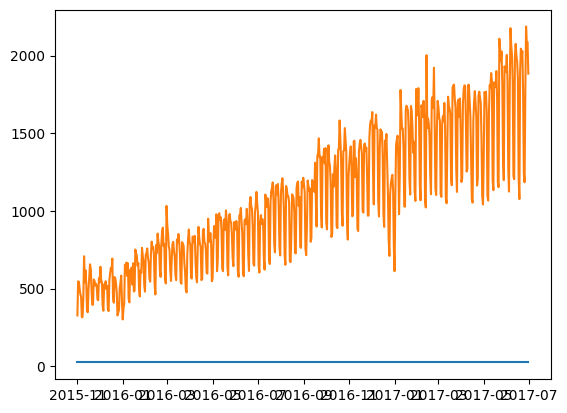

In [5]:
plt.plot(data)
plt.show()


#**Single Exponential smoothing**





In [6]:
from statsmodels.tsa.api import SimpleExpSmoothing
traffic_volume = data['Vehicles']  # Replace 'TrafficVolume' with the actual column name
model = SimpleExpSmoothing(traffic_volume)
model_single_fit = model.fit()


## Making predictions





In [7]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)


2017-07-01    1796.017251
2017-07-02    1796.017251
2017-07-03    1796.017251
2017-07-04    1796.017251
2017-07-05    1796.017251
2017-07-06    1796.017251
Freq: D, dtype: float64


## Visualize Single Exponential Smoothing




In [8]:
forecast_single = model_single_fit.forecast(40)


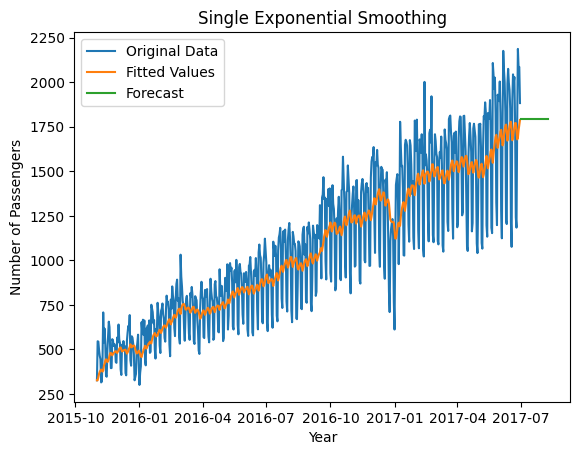

In [9]:
plt.plot(traffic_volume, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()


#**Double Exponential Smoothing**




In [10]:
from statsmodels.tsa.api import Holt

model_double = Holt(traffic_volume)
model_double_fit = model_double.fit()


## Making predictions



In [11]:
forecast_double = model_double_fit.forecast(40)
print(forecast_double)


2017-07-01    1889.009759
2017-07-02    1893.954575
2017-07-03    1898.899390
2017-07-04    1903.844206
2017-07-05    1908.789021
2017-07-06    1913.733837
2017-07-07    1918.678653
2017-07-08    1923.623468
2017-07-09    1928.568284
2017-07-10    1933.513099
2017-07-11    1938.457915
2017-07-12    1943.402731
2017-07-13    1948.347546
2017-07-14    1953.292362
2017-07-15    1958.237177
2017-07-16    1963.181993
2017-07-17    1968.126808
2017-07-18    1973.071624
2017-07-19    1978.016440
2017-07-20    1982.961255
2017-07-21    1987.906071
2017-07-22    1992.850886
2017-07-23    1997.795702
2017-07-24    2002.740517
2017-07-25    2007.685333
2017-07-26    2012.630149
2017-07-27    2017.574964
2017-07-28    2022.519780
2017-07-29    2027.464595
2017-07-30    2032.409411
2017-07-31    2037.354227
2017-08-01    2042.299042
2017-08-02    2047.243858
2017-08-03    2052.188673
2017-08-04    2057.133489
2017-08-05    2062.078304
2017-08-06    2067.023120
2017-08-07    2071.967936
2017-08-08  

## Visualize Double Exponential Smoothing




In [12]:
forecast_double = model_double_fit.forecast(20)


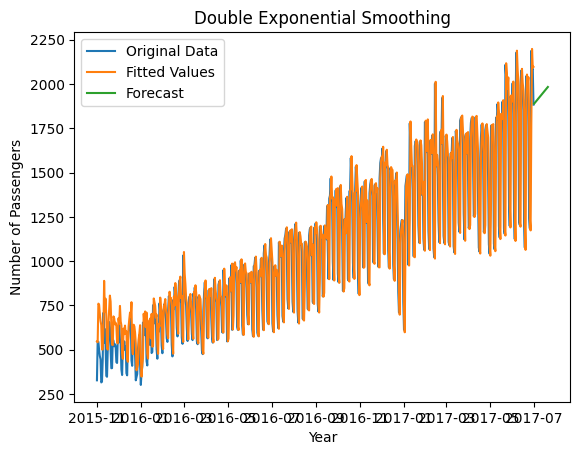

In [13]:
plt.plot(traffic_volume, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()


#**Holt-Winter’s Seasonal Smoothing**






In [14]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    traffic_volume, seasonal_periods=4, trend='add', seasonal='add')  # Adjust seasonal_periods to fit your data
model_triple_fit = model_triple.fit()


c:\Users\wwwwe\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Making predictions



In [15]:
forecast_triple = model_triple_fit.forecast(20)
print(forecast_triple)


2017-07-01    1836.085994
2017-07-02    1874.491760
2017-07-03    1795.589323
2017-07-04    1833.893476
2017-07-05    1851.334933
2017-07-06    1889.740698
2017-07-07    1810.838262
2017-07-08    1849.142415
2017-07-09    1866.583871
2017-07-10    1904.989637
2017-07-11    1826.087200
2017-07-12    1864.391353
2017-07-13    1881.832810
2017-07-14    1920.238575
2017-07-15    1841.336139
2017-07-16    1879.640292
2017-07-17    1897.081748
2017-07-18    1935.487514
2017-07-19    1856.585078
2017-07-20    1894.889231
Freq: D, dtype: float64


## Visualize Triple Exponential Smoothing




In [16]:
forecast_triple = model_triple_fit.forecast(20)


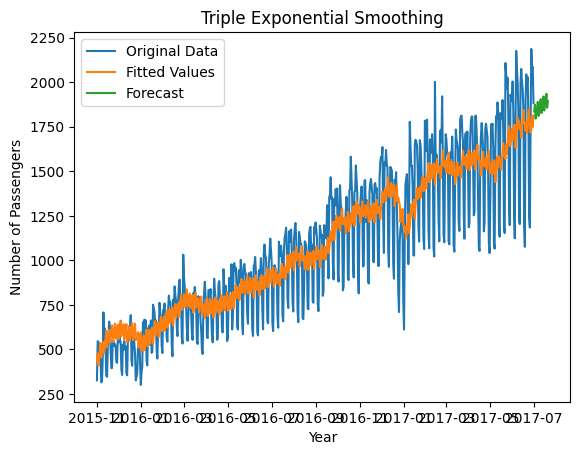

In [17]:
plt.plot(traffic_volume, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()


##**Well done :)**